In [1]:
# import sys
# sys.path.append("dataloaders/")
from davis import VOSDataset, get_loader
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from omegaconf import OmegaConf

In [2]:
config = {
    "precision": "16-mixed",
    "num_devices": 1,
    "num_epochs": 50,
    "metric_train_eval_interval": 20,
    "log_every_n_steps": 1,
    "img_size": 1024,
    "out_dir": "/",
    "opt": {
        "learning_rate": 8e-4,
        "weight_decay": 1e-4,
        "decay_factor": 10,
        "steps": [60000, 86666],
        "warmup_steps": 250,
    },
    "model": {
        "type": "vit_b",
        "checkpoint": "sam_vit_b_01ec64.pth",
        "freeze": {
            "image_encoder": True,
            "prompt_encoder": True,
            "mask_decoder": True,
        },
    },
    "dataset": {
        "root_dir": "../raw/DAVIS/",
        "batch_size": 1,
        "max_num_obj": 1,
        "num_frames": 2,
        "max_jump": 5,
        "num_workers": 0,
        "pin_memory": True,
    },
}


# First use cpu to load models. Pytorch Lightning will automatically move it to GPUs.
cfg = OmegaConf.create(config).dataset

In [3]:
train, val = get_loader(cfg)

Training Samples:  60
90 out of 90 videos accepted in ../raw/DAVIS/JPEGImages/Full-Resolution.
Validation Samples:  30
90 out of 90 videos accepted in ../raw/DAVIS/JPEGImages/Full-Resolution.


In [4]:
x = next(iter(val))

In [5]:
x[0]['prev_masks'].shape

torch.Size([1, 1, 256, 256])

In [6]:
x[0]['info']

{'name': 'bear', 'frames': ['00004.jpg', '00008.jpg'], 'num_objects': 1}

In [7]:
x[0]['selector']

tensor([True])

In [8]:
x[0]["image"].shape

torch.Size([2, 3, 576, 1024])

In [9]:
import numpy as np
np.unique(x[0]['gt_mask'])

array([0., 1.], dtype=float32)

In [10]:
for k in x[0]:
    try:
        print(k, x[0][k].shape, type(x[0][k]))
    except:
        print(k)
x[0]['selector']

image torch.Size([2, 3, 576, 1024]) <class 'torch.Tensor'>
gt_mask torch.Size([1, 1080, 1920]) <class 'torch.Tensor'>
prev_masks torch.Size([1, 1, 256, 256]) <class 'torch.Tensor'>
selector torch.Size([1]) <class 'torch.Tensor'>
info
original_size


tensor([True])

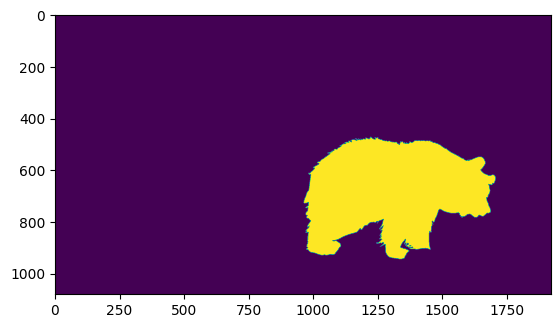

In [11]:
plt.imshow(x[0]["gt_mask"][0])

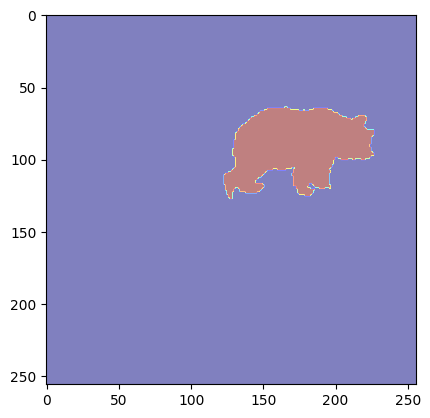

<Figure size 640x480 with 0 Axes>

In [14]:
for i in range(1):
    # plt.imshow(x[0]['image'][i][0], cmap='gray')
    plt.imshow(x[0]['prev_masks'][i][0], cmap='jet', alpha=0.5)
    plt.figure()

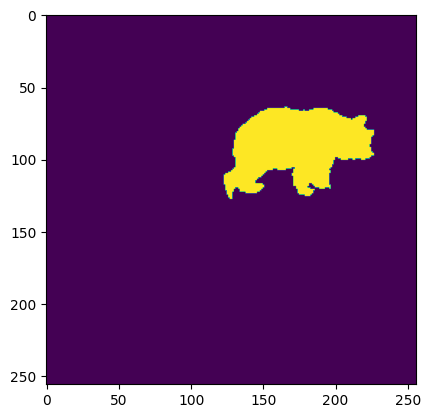

<Figure size 640x480 with 0 Axes>

In [15]:
for i in range(1):
    plt.imshow(x[0]['prev_masks'][0][i])
    plt.figure()

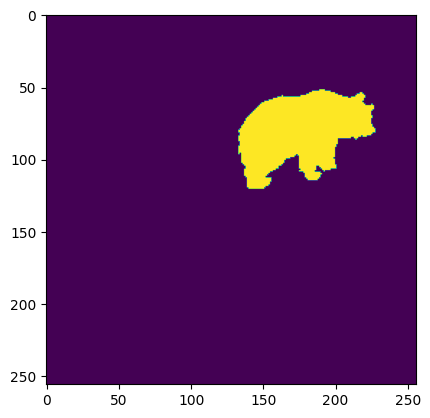

<Figure size 640x480 with 0 Axes>

In [15]:
for i in range(1):
    plt.imshow(x[0]['prev_masks'][0][i])
    plt.figure()

In [8]:
from os import path
bl_root = "DAVIS"
dataset = VOSDataset('../raw/DAVIS/JPEGImages/Full-Resolution', '../raw/DAVIS/Annotations/Full-Resolution', max_jump=5, is_bl=False, num_frames=8,  max_num_obj=1, finetune=False)


90 out of 90 videos accepted in ../raw/DAVIS/JPEGImages/Full-Resolution.


In [ ]:
def collate_fn(batch):
    return batch    

In [3]:
# import cv2
# import matplotlib.pyplot as plt
# plt.imshow(cv2.imread("DAVIS/JPEGImages/Full-Resolution/dance-twirl/00043.jpg")[:,:,::-1])

In [4]:
data = dataset[20]

==
[0]
{1, 2, 3, 4, 5}
----
[0]
{1, 2, 3, 4, 5}
----
[0, 1]
{2, 3, 4, 5, 6}
----
[0, 1, 6]
{2, 3, 4, 5, 7, 8, 9, 10, 11}
----
[0, 1, 6, 8]
{2, 3, 4, 5, 7, 9, 10, 11, 12, 13}
==
[0, 1, 3, 6, 8]
(1920, 1080)
torch.Size([3, 576, 1024]) (1080, 1920)
(1920, 1080)
torch.Size([3, 576, 1024]) (1080, 1920)
(1920, 1080)
torch.Size([3, 576, 1024]) (1080, 1920)
(1920, 1080)
torch.Size([3, 576, 1024]) (1080, 1920)
(1920, 1080)
torch.Size([3, 576, 1024]) (1080, 1920)
torch.Size([5, 3, 576, 1024]) torch.Size([7, 256, 256]) (1080, 1920)


/home/frozenwolf/miniconda3/envs/sam/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [5]:
data['image'].shape

torch.Size([3, 576, 1024])

In [6]:
data['prev_masks'].shape

torch.Size([1, 7, 256, 256])

In [7]:
data['gt_mask'].shape

(1080, 1920)

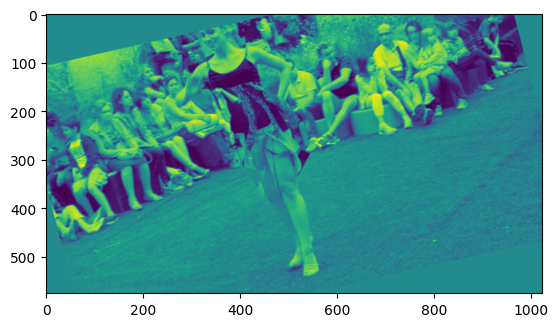

In [8]:
import matplotlib.pyplot as plt

plt.imshow(data['image'][0].numpy())

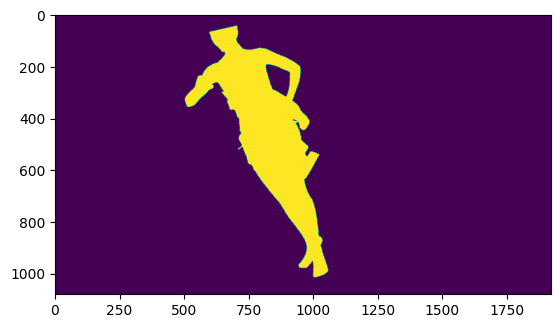

In [9]:
plt.imshow(data['gt_mask'])

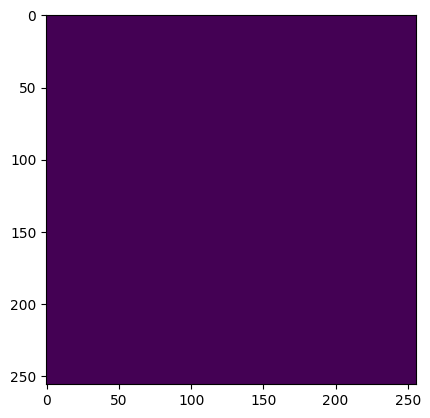

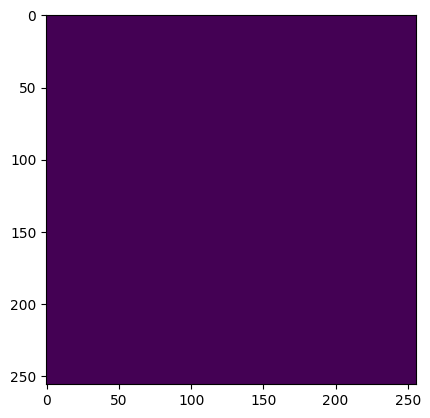

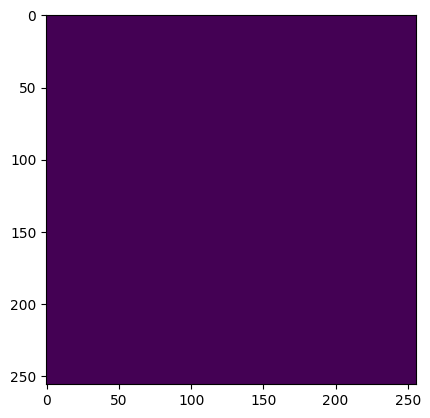

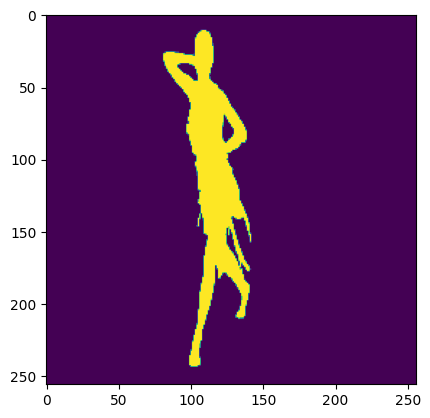

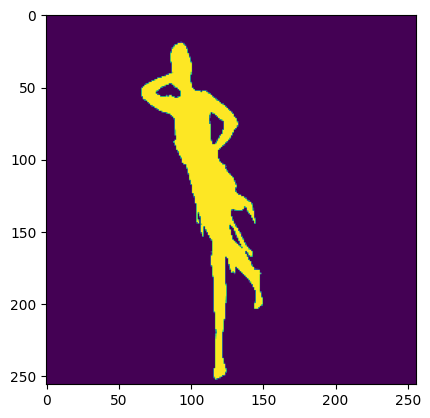

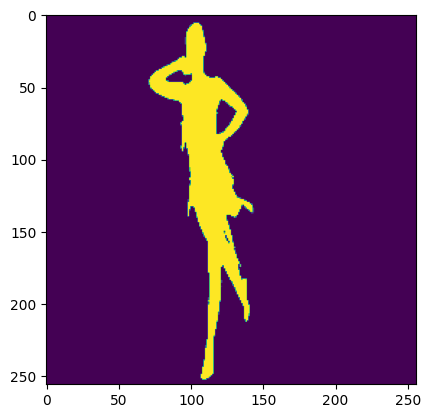

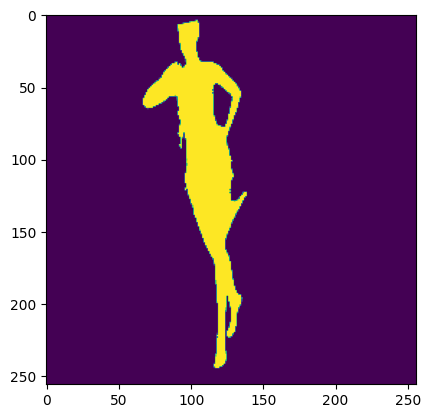

In [10]:
for i in data['prev_masks'][0]:
    plt.imshow(i)
    plt.show()

In [ ]:
data.keys()

dict_keys(['rgb', 'first_frame_gt', 'cls_gt', 'selector', 'info'])

In [12]:
def collate_fn(batch):
    return batch


train_loader = DataLoader(dataset, 2, drop_last=True, collate_fn=collate_fn)
x = next(iter(train_loader))

==
[0]
{1, 2, 3, 4, 5}
----
[0]
{1, 2, 3, 4, 5}
----
[0, 2]
{1, 3, 4, 5, 6, 7}
==
[0, 2, 6]
(1920, 1080)
torch.Size([3, 576, 1024]) (1080, 1920)
(1920, 1080)
torch.Size([3, 576, 1024]) (1080, 1920)
(1920, 1080)
torch.Size([3, 576, 1024]) (1080, 1920)
torch.Size([3, 3, 576, 1024]) torch.Size([7, 256, 256]) (1080, 1920)
==
[0]
{1, 2, 3, 4, 5}
----
[0]
{1, 2, 3, 4, 5}
----
[0, 2]
{1, 3, 4, 5, 6, 7}
----
[0, 2, 3]
{1, 4, 5, 6, 7, 8}
----
[0, 2, 3, 4]
{1, 5, 6, 7, 8, 9}
----
[0, 2, 3, 4, 5]
{1, 6, 7, 8, 9, 10}
----
[0, 2, 3, 4, 5, 10]
{1, 6, 7, 8, 9, 11, 12, 13, 14, 15}
----
[0, 2, 3, 4, 5, 10, 12]
{1, 6, 7, 8, 9, 11, 13, 14, 15, 16, 17}
==
[0, 2, 3, 4, 5, 6, 10, 12]
(1920, 1080)
torch.Size([3, 576, 1024]) (1080, 1920)
(1920, 1080)
torch.Size([3, 576, 1024]) (1080, 1920)
(1920, 1080)
torch.Size([3, 576, 1024]) (1080, 1920)
(1920, 1080)
torch.Size([3, 576, 1024]) (1080, 1920)
(1920, 1080)
torch.Size([3, 576, 1024]) (1080, 1920)
(1920, 1080)
torch.Size([3, 576, 1024]) (1080, 1920)
(1920, 1080

In [16]:
x[0]['image'].shape

torch.Size([3, 576, 1024])

In [17]:
x[0]['gt_mask'].shape

(1080, 1920)

In [18]:
x[0]['prev_masks'].shape

torch.Size([1, 7, 256, 256])

In [19]:
x[0]['orginal_size']

(1080, 1920)

In [ ]:
x['rgb'].shape, x['first_frame_gt'].shape, x['cls_gt'].shape

(torch.Size([2, 4, 3, 384, 384]),
 torch.Size([2, 1, 3, 384, 384]),
 torch.Size([2, 4, 1, 384, 384]))

In [ ]:
x['selector'], x['info']

(tensor([[1., 0., 0.],
         [1., 1., 0.]]),
 {'name': ['bear', 'bike-packing'],
  'frames': [('00064.jpg', '00060.jpg'),
   ('00061.jpg', '00065.jpg'),
   ('00060.jpg', '00066.jpg'),
   ('00057.jpg', '00067.jpg')],
  'num_objects': tensor([1, 2])})